In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


#### 데이터 조사

In [123]:
# 데이터 로드
housing = pd.read_csv("housing.csv")
housing.head(10)
housing.tail(10)

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [ ]:
housing.info()

In [ ]:
housing.describe()
# 피쳐 확인
# 0)경도 1) 위도 2) 구매나이의 중앙값 3) 전체 방 수 4) 전체 침실 수 5) 인구 6) 가정 7) 수입의 중앙값 8) 집값 중앙값 9) 내륙/해안가 유형

In [ ]:
housing["ocean_proximity"].value_counts()

In [ ]:
housing.hist(bins=120, figsize = (16,12))
plt.show()
# 테스트셋을 분리하기 전 잠깐 확인

In [124]:
# 테스트셋 분리
from sklearn.model_selection import train_test_split

X, y = train_test_split(housing, test_size = 0.2 , random_state = 9)
# 무작위 샘플링

<AxesSubplot: >

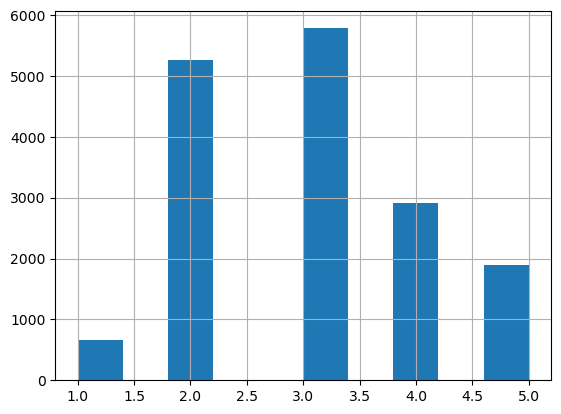

In [125]:
# 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [126]:
# 데이터 분할 수=1
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 9)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_train_set.info()

KeyError: '[1442, 4778, 391, 12676, 12932, 2308, 10292, 16216, 11653, 2494, 9009, 4269, 7118, 8639, 5824, 15116, 14693, 1109, 11616, 9415, 12578, 3005, 5613, 64, 16471, 1443, 14611, 796, 11757, 2389, 8886, 5421, 10955, 15393, 10835, 7355, 9523, 13919, 9126, 12419, 3096, 3932, 3588, 8308, 502, 16481, 16448, 4669, 9166, 1917, 2687, 9079, 10810, 3573, 7548, 9323, 10793, 7155, 14299, 6020, 665, 11648, 5420, 5959, 5550, 6882, 4337, 5066, 7952, 4674, 7597, 9188, 5217, 11511, 12351, 10257, 9135, 14661, 13788, 1843, 5516, 13992, 8178, 15822, 10918, 7339, 8448, 10358, 11292, 602, 20, 11572, 13989, 2227, 6150, 3231, 3055, 12028, 8007, 7410, 389, 3875, 3716, 5200, 1381, 12890, 8709, 2799, 114, 753, 7181, 8666, 16215, 5473, 4521, 2767, 2625, 7960, 6604, 15832, 10036, 13389, 6591, 16408, 147, 10613, 14023, 14397, 11557, 1585, 8162, 4377, 1628, 2614, 11628, 5554, 5413, 14018, 13888, 4883, 11279, 16330, 6493, 14997, 5835, 9996, 12011, 1781, 11549, 757, 5034, 16309, 6453, 834, 2106, 4238, 14714, 5190, 4187, 9838, 6176, 7600, 14564, 11835, 3053, 5351, 5050, 4682, 5561, 3519, 12317, 16124, 14297, 2292, 14283, 11931, 11176, 8, 12121, 8696, 15779, 14798, 2611, 5954, 4526, 10944, 14315, 2843, 11928, 12721, 6877, 15079, 14917, 2147, 9021, 8569, 5674, 16000, 8806, 12322, 5789, 6277, 5957, 10360, 13979, 12993, 10591, 8033, 5145, 4449, 3538, 8844, 13810, 16067, 11747, 12682, 16444, 13415, 14074, 9118, 98, 8978, 7421, 4263, 3742, 4370, 8565, 6084, 9832, 6369, 5780, 7657, 10213, 9162, 1259, 3136, 7, 4811, 5836, 8542, 8799, 118, 6258, 1698, 13921, 7826, 3583, 13600, 7260, 10599, 8675, 11188, 11243, 7242, 2553, 5227, 2998, 10636, 11090, 3470, 14124, 2416, 4194, 11980, 15566, 2166, 1359, 14384, 8484, 1473, 14670, 1934, 2207, 2296, 8482, 15855, 4643, 12896, 13257, 3510, 3960, 7602, 13467, 2136, 12781, 2367, 11800, 14559, 12971, 15753, 15067, 9183, 5975, 16228, 6128, 13123, 5491, 989, 837, 6727, 3312, 1450, 5424, 6503, 11158, 10986, 5558, 8842, 2938, 15974, 4993, 16070, 10712, 13676, 9626, 4534, 14935, 13941, 11569, 7642, 473, 10033, 13970, 3942, 1810, 15313, 12558, 8444, 4928, 12518, 831, 122, 13205, 2164, 2230, 8807, 4441, 14562, 6514, 9778, 3516, 8424, 10048, 5166, 5993, 491, 4859, 9460, 9071, 12248, 7203, 7629, 1251, 7142, 8230, 8752, 164, 6592, 14087, 16456, 13248, 10846, 8314, 8260, 16294, 9905, 7501, 10907, 13820, 7017, 15279, 3995, 6172, 556, 6855, 9833, 16347, 10984, 1188, 12509, 6049, 8879, 8118, 13660, 8215, 1989, 12097, 9494, 10727, 397, 11211, 5243, 12377, 14052, 1348, 2037, 15149, 12727, 1379, 6713, 1182, 3883, 2033, 2080, 15491, 15570, 9700, 807, 12250, 569, 7043, 4907, 9489, 2507, 11609, 14507, 9611, 6244, 4175, 15732, 14726, 11012, 11762, 7940, 7780, 7302, 13239, 13008, 10786, 519, 4544, 9888, 13075, 1551, 3670, 15755, 13794, 7505, 966, 16106, 1542, 16385, 7688, 15481, 9075, 3090, 8244, 6996, 1412, 8136, 13456, 4453, 4310, 7044, 16328, 1630, 13174, 13651, 14093, 9144, 3282, 7369, 7233, 6239, 7958, 3657, 14314, 4625, 3068, 3592, 13324, 4737, 15022, 3154, 2270, 8404, 3522, 884, 3258, 8793, 9211, 16008, 12029, 8615, 11680, 2918, 13984, 11475, 11690, 2151, 2127, 8500, 932, 8274, 11951, 11992, 7228, 11517, 15840, 282, 6716, 1122, 14434, 4941, 2910, 71, 15617, 8712, 2954, 7251, 11, 11870, 671, 6324, 10521, 6508, 7769, 2329, 9483, 5804, 7079, 3856, 2921, 9241, 16505, 9674, 1277, 4447, 16450, 1643, 14178, 15691, 10144, 7446, 5590, 7516, 8609, 16184, 782, 10327, 13448, 3074, 15213, 12637, 12164, 11447, 10661, 6449, 4478, 14961, 7866, 2117, 9897, 7938, 968, 14489, 2099, 14794, 11456, 12442, 10283, 4999, 163, 8547, 1605, 6096, 8511, 15899, 7885, 8866, 14547, 15118, 2666, 8049, 10572, 5545, 7719, 13365, 14257, 8107, 3113, 2483, 15527, 8797, 3693, 14664, 10865, 3878, 1680, 11915, 3467, 10962, 6458, 16468, 12064, 4356, 1594, 10781, 2878, 3012, 1071, 12205, 4222, 14460, 4120, 3277, 10739, 12924, 5446, 1904, 12023, 1855, 1106, 9807, 9475, 14424, 11376, 4804, 5356, 509, 11698, 16144, 5149, 14183, 14735, 8474, 1211, 3351, 1303, 9854, 3309, 14043, 9766, 10673, 9408, 13192, 8693, 14722, 13431, 8184, 12767, 11210, 864, 12395, 6553, 7085, 5196, 8330, 439, 11570, 1429, 15538, 4289, 12686, 11166, 1589, 7855, 15432, 13175, 12327, 13131, 9695, 6623, 16496, 403, 9973, 15493, 10059, 1878, 12399, 5697, 577, 6642, 12999, 3109, 15345, 9206, 5452, 9665, 4966, 2300, 3133, 8432, 14276, 15454, 2366, 1556, 5205, 12848, 10370, 13489, 4383, 15927, 13444, 13048, 6504, 7185, 849, 11325, 16252, 3585, 11239, 14561, 878, 1980, 9762, 3173, 13595, 2632, 3365, 3143, 7407, 760, 12712, 11070, 6815, 13523, 7686, 5026, 1962, 993, 16253, 5499, 15194, 14416, 2097, 11336, 3500, 5570, 13331, 15710, 5393, 3064, 3156, 8391, 7757, 14849, 10196, 9747, 3881, 9244, 13623, 4609, 1082, 6403, 9447, 6543, 3772, 8397, 14343, 4078, 9845, 13298, 14275, 10009, 13503, 11869, 515, 15074, 11633, 9730, 3530, 6565, 12925, 202, 16121, 2973, 6100, 13713, 5913, 15632, 15893, 12742, 2456, 12835, 10338, 14905, 14569, 8022, 7321, 9078, 15268, 2461, 942, 9171, 9209, 12335, 8218, 10235, 15457, 7078, 10394, 5260, 6712, 12026, 10663, 2403, 13230, 1135, 4657, 3982, 6379, 4746, 2740, 11548, 9753, 4824, 15125, 15403, 6207, 745, 11448, 9473, 7328, 9347, 11604, 9262, 16163, 14887, 2884, 7292, 7213, 7883, 2120, 1176, 11971, 10026, 15083, 3574, 5162, 2267, 14744, 14886, 12459, 1136, 2582, 6797, 9409, 7947, 9680, 5528, 7806, 14217, 1956, 949, 799, 13938, 14046, 11812, 7394, 8366, 4886, 1912, 3317, 5792, 3645, 10093, 4215, 4142, 14532, 14797, 13289, 79, 1021, 4838, 8382, 2400, 6356, 6197, 8035, 23, 4095, 230, 6813, 1047, 1275, 15008, 3673, 1516, 10571, 535, 2353, 9670, 1888, 7998, 16313, 10659, 2475, 14389, 11946, 45, 10979, 15039, 15107, 12091, 11269, 2986, 5021, 2951, 3488, 13485, 8289, 1681, 12624, 7917, 1395, 9497, 393, 8541, 6696, 10387, 3214, 16136, 707, 8619, 1740, 13990, 7734, 13433, 4660, 12129, 11657, 5313, 6830, 6582, 3479, 16239, 4876, 1646, 5963, 6392, 10172, 4208, 2883, 7299, 8064, 8400, 7469, 6573, 1020, 12545, 1512, 1471, 2956, 12071, 1846, 9689, 13702, 13737, 2479, 12938, 9826, 7131, 10175, 10349, 1225, 4084, 7021, 10886, 689, 3927, 9959, 5417, 9552, 3884, 1919, 12947, 13855, 12180, 2041, 12252, 3829, 487, 1529, 8401, 2603, 6865, 11979, 10582, 15506, 14591, 6444, 11032, 6681, 208, 7490, 10823, 8928, 12417, 7776, 258, 5946, 2264, 7230, 14061, 3080, 14916, 15600, 12072, 10262, 8803, 8548, 12514, 9831, 1624, 12898, 14592, 15850, 14986, 1086, 485, 11212, 6119, 15293, 14436, 9642, 5790, 5930, 14007, 13441, 2620, 15953, 7214, 16052, 4140, 5285, 7330, 2601, 15309, 1304, 1229, 8143, 3997, 9561, 7459, 2425, 10220, 10411, 16046, 3600, 532, 8905, 4714, 15739, 10917, 3002, 8514, 11770, 8804, 7116, 8132, 7184, 10381, 6270, 56, 10353, 7206, 3523, 13343, 5818, 13805, 13714, 12710, 8874, 8073, 14373, 10193, 12879, 12965, 9470, 13968, 6989, 11962, 13680, 14630, 7512, 11920, 10997, 15433, 5289, 14484, 9656, 11295, 4459, 12648, 16453, 8550, 10833, 16135, 1656, 9110, 1286, 11766, 14062, 3991, 4318, 14883, 2317, 10365, 7284, 3905, 4338, 8536, 14214, 4610, 10434, 15512, 4738, 4089, 9128, 13126, 5077, 9019, 15315, 545, 6015, 15234, 788, 12432, 14521, 7159, 1617, 6702, 4107, 14054, 2412, 12595, 10826, 13578, 8936, 12232, 5573, 5223, 8303, 10414, 16063, 648, 342, 10905, 12524, 14474, 1695, 8906, 15487, 14782, 7083, 5300, 15113, 4472, 12642, 3336, 8829, 8705, 13796, 2346, 13750, 4869, 2384, 9156, 7957, 4188, 7829, 1401, 5696, 5861, 11312, 9806, 7442, 14715, 13351, 4397, 2339, 14031, 12291, 6952, 14531, 11635, 7937, 5534, 3623, 3297, 9114, 13615, 14631, 13612, 16065, 10346, 12145, 3333, 12319, 6546, 2079, 14776, 4050, 8744, 13127, 16175, 1553, 14606, 12635, 817, 11030, 6157, 13516, 5311, 8017, 15311, 13659, 221, 7944, 1519, 11099, 3217, 4352, 11482, 14318, 2359, 13939, 13450, 7912, 11068, 12609, 13313, 6445, 983, 13952, 7735, 11046, 10844, 4878, 3331, 6684, 11484, 5901, 9417, 6360, 15867, 14335, 102, 15271, 14995, 14796, 9011, 1946, 12068, 12107, 16123, 3061, 10857, 4700, 1775, 5015, 3943, 9708, 10322, 6364, 3228, 12353, 13193, 3779, 5608, 12929, 6743, 2560, 10753, 6699, 8921, 4115, 11045, 10912, 2754, 13520, 12430, 1294, 1905, 4287, 4950, 7473, 8221, 7945, 11219, 273, 9752, 1714, 11563, 6778, 7363, 277, 11371, 11712, 1105, 10214, 84, 14984, 10942, 251, 9842, 9004, 7061, 13236, 2020, 5938, 13303, 3537, 16238, 14824, 14607, 11293, 2745, 2930, 7593, 14815, 7475, 7338, 2676, 4930, 6434, 610, 9430, 1627, 8505, 445, 16414, 9906, 3749, 2444, 13323, 14867, 13150, 292, 584, 593, 11708, 348, 12347, 11647, 8717, 6070, 1649, 13134, 15102, 13721, 187, 3863, 2470, 8746, 4264, 12494, 11282, 13251, 488, 4097, 3435, 2288, 9535, 14082, 5595, 3868, 6563, 9869, 5746, 6313, 10854, 7146, 14325, 6539, 12636, 12828, 11074, 8794, 12415, 9227, 227, 3158, 12093, 1310, 12665, 3964, 15737, 1430, 11095, 3604, 9423, 9442, 13812, 5474, 6226, 15296, 8774, 13053, 12613, 352, 4528, 4870, 2636, 5131, 8358, 1240, 14486, 6082, 14307, 5017, 10951, 2314, 1234, 13002, 12701, 9595, 7432, 13010, 4378, 15217, 13542, 3683, 3445, 15529, 929, 15137, 12536, 15117, 15012, 6827, 11742, 16057, 6216, 11964, 5618, 366, 4911, 413, 530, 10001, 13035, 12104, 2747, 13328, 9353, 883, 2662, 16098, 15610, 9602, 5813, 11459, 1545, 9325, 4396, 13983, 16392, 6832, 658, 3983, 6613, 4436, 7547, 6926, 12245, 13550, 15202, 10682, 2294, 11039, 1323, 12976, 15557, 7665, 3897, 814, 4051, 13639, 11402, 13670, 7841, 15321, 5104, 2010, 16318, 11576, 15196, 3952, 14848, 6685, 15928, 1151, 4932, 16159, 2856, 1199, 6821, 1625, 9477, 4565, 12266, 2349, 2511, 5092, 14118, 11241, 10313, 15399, 11972, 2933, 2222, 14952, 7144, 14740, 8195, 14624, 10271, 2363, 12517, 6703, 4400, 8110, 6095, 10832, 10792, 4172, 10890, 8025, 4562, 4426, 4056, 14216, 11077, 3505, 16022, 6385, 5503, 11204, 15037, 252, 5079, 6416, 12258, 5106, 10398, 12954, 11850, 9856, 8044, 7862, 16112, 10108, 13869, 2738, 15061, 6175, 3256, 4292, 8101, 14773, 358, 2645, 10221, 15091, 6945, 14422, 11575, 14133, 8248, 985, 5340, 14265, 13705, 4211, 7860, 14346, 1880, 11398, 14537, 10956, 7349, 11175, 14826, 4921, 12916, 4275, 4556, 4049, 1335, 14040, 10535, 1786, 826, 13583, 14802, 9584, 4607, 10038, 4463, 10759, 8196, 8961, 8241, 214, 2326, 4165, 15456, 7797, 12221, 934, 2771, 6697, 12646, 7956, 7026, 13255, 11629, 7722, 8348, 15988, 8611, 1659, 9779, 14289, 5186, 4343, 11135, 12253, 7481, 4412, 8798, 16255, 13374, 13043, 6165, 13411, 4039, 4183, 12090, 952, 7626, 228, 4506, 16289, 7435, 338, 16016, 6629, 12050, 1816, 5798, 13200, 12035, 5434, 15721, 16042, 10720, 1972, 13469, 16341, 13019, 15818, 15152, 1195, 673, 10077, 601, 3037, 12115, 2235, 4072, 5229, 5678, 15777, 4118, 10514, 4446, 846, 10194, 1602, 14042, 4132, 11467, 8966, 4763, 3718, 7132, 2760, 9127, 13468, 7025, 14172, 6957, 11509, 11707, 16398, 8167, 11504, 12216, 1841, 13419, 13025, 7453, 2694, 1218, 8933, 1760, 13238, 1845, 10837, 5338, 16049, 2804, 1003, 9024, 15616, 10419, 14756, 10878, 3568, 141, 8090, 12480, 9563, 7532, 8108, 11111, 9968, 14614, 8563, 5481, 14471, 5717, 14734, 1665, 11522, 5492, 2558, 1657, 7430, 2891, 644, 13449, 2254, 5749, 2158, 8163, 3677, 241, 6054, 6995, 16176, 4686, 8571, 11197, 14658, 8408, 2371, 15870, 6466, 12824, 13679, 954, 6575, 5080, 15762, 15587, 12044, 8513, 9850, 5918, 16504, 4598, 10527, 6664, 13597, 3717, 15135, 1153, 7696, 4676, 15429, 756, 5781, 2453, 7129, 7546, 13696, 6261, 7239, 11198, 14743, 13312, 3798, 5770, 4445, 5153, 14657, 6487, 7514, 15364, 14915, 9330, 2736, 1949, 9885, 1534, 827, 9184, 6930, 16413, 978, 7140, 6680, 2201, 2065, 11622, 14192, 7164, 5867, 13297, 12814, 6173, 2589, 5295, 2948, 12720, 1731, 6968, 15347, 2599, 14632, 8161, 15839, 8963, 10822, 10037, 10709, 3630, 10915, 11471, 15757, 10563, 15437, 2304, 13414, 14097, 11660, 8699, 1414, 8708, 10181, 765, 8217, 9596, 6544, 12711, 7035, 591, 2718, 4764, 7274, 4831, 9113, 12860, 11019, 15048, 13898, 6972, 4373, 2711, 10581, 6529, 459, 5185, 11011, 3387, 14623, 16204, 4581, 3050, 14341, 417, 12508, 6233, 10850, 4803, 3224, 3447, 8176, 7143, 5640, 11264, 13475, 8559, 10544, 2917, 12874, 7753, 4439, 3528, 695, 15120, 3396, 5694, 7357, 10910, 14030, 2549, 16173, 8770, 7618, 16402, 33, 289, 15015, 14226, 7414, 5521, 1933, 12989, 5399, 14653, 6116, 12542, 14808, 10959, 7766, 11207, 3706, 7989, 10489, 10964, 10672, 11537, 5382, 15103, 1312, 1794, 1590, 9945, 7877, 13338, 15466, 8160, 13354, 2196, 15696, 1737, 668, 6969, 2442, 9381, 15577, 15519, 7575, 12794, 15647, 4410, 10106, 14729, 7272, 13225, 1387, 4512, 4173, 4600, 13666, 10828, 8932, 8065, 4920, 6456, 10812, 11993, 2140, 12671, 7707, 12238, 525, 6783, 14071, 4205, 12766, 1222, 13759, 15842, 12610, 1169, 15547, 13280, 6133, 2113, 2064, 5923, 7034, 7844, 12974, 3153, 9681, 16369, 13969, 15145, 11723, 4111, 2255, 8849, 11547, 6764, 15488, 4906, 6162, 5891, 2118, 5958, 10937, 13772, 5495, 11071, 16236, 7694, 16351, 11646, 9938, 14126, 8897, 15834, 9725, 1050, 3700, 7805, 11297, 2656, 10029, 1523, 6810, 5325, 4048, 1503, 8904, 4367, 5929, 892, 12303, 1637, 5357, 16149, 13114, 8005, 6564, 898, 7399, 14522, 3366, 819, 15179, 12295, 12485, 2375, 5391, 11460, 14786, 10250, 2765, 13006, 7509, 6209, 11974, 12729, 12752, 9641, 16422, 3619, 6850, 14015, 16205, 8278, 171, 9667, 9466, 3871, 9402, 4146, 3984, 15314, 11718, 13980, 2787, 7721, 13031, 10162, 6902, 3581, 808, 2156, 5411, 3836, 9940, 14739, 10684, 196, 6315, 11585, 2502, 13994, 11134, 8378, 6626, 6417, 1095, 13399, 9581, 3438, 4583, 12080, 13811, 3649, 5651, 9949, 169, 8170, 8237, 10936, 5980, 16251, 10209, 1224, 15609, 13740, 15278, 13017, 787, 11912, 13642, 7648, 8863, 12833, 10403, 16350, 3417, 13372, 6688, 1686, 10386, 6935, 15354, 2835, 7295, 4075, 4855, 8102, 705, 11384, 7997, 9193, 5699, 14108, 7265, 5955, 9592, 9793, 13249, 1231, 6624, 15693, 5693, 3123, 11109, 6024, 2376, 2809, 11185, 15530, 1063, 9271, 14141, 11795, 9536, 9719, 15383, 5266, 14885, 16437, 6817, 7637, 12907, 6327, 2469, 426, 15596, 15300, 15489, 557, 12921, 3518, 5169, 14999, 1487, 14895, 1615, 10396, 11948, 7250, 4997, 3912, 12791, 13751, 14481, 8254, 8392, 4185, 2862, 9138, 402, 9282, 11644, 5027, 8914, 9756, 16257, 16324, 12468, 4164, 10043, 1930, 4080, 4277, 2806, 1089, 188, 14864, 16475, 8975, 6852, 13848, 384, 5691, 1399, 15507, 926, 3335, 6598, 13789, 10166, 7443, 2062, 14227, 6847, 12111, 301, 14593, 14376, 3618, 5860, 9446, 3408, 505, 8220, 16376, 12046, 6512, 7684, 14435, 7105, 11590, 10651, 13319, 10329, 10139, 9566, 6486, 7900, 4135, 5866, 10749, 10269, 5811, 7645, 716, 6171, 2963, 11596, 14908, 8088, 5723, 6873, 7770, 7928, 1175, 8324, 10755, 15656, 1863, 4234, 3172, 9041, 7178, 10294, 13377, 161, 5003, 3213, 4597, 15095, 12371, 1647, 10251, 7903, 6884, 15041, 274, 12521, 8835, 4313, 16091, 12504, 6494, 9546, 9577, 3833, 11004, 10397, 5896, 14263, 15607, 16278, 3267, 2807, 14993, 13346, 939, 5001, 14272, 7557, 4286, 4143, 8716, 7857, 12580, 887, 1744, 10851, 14273, 7199, 6966, 6368, 9741, 9543, 4745, 8577, 5969, 5670, 139, 14609, 16018, 15108, 4887, 131, 15761, 15717, 1815, 12552, 647, 637, 15115, 4614, 9974, 11961, 16495, 4790, 11510, 7610, 14790, 8277, 11502, 9696, 128, 7899, 13864, 3901, 2210, 1440, 5231, 8420, 7226, 6988, 13147, 12707, 4589, 10227, 244, 4134, 8833, 15124, 10690, 12967, 6185, 14775, 8129, 13673, 804, 13856, 5375, 16425, 14310, 677, 10825, 14364, 8157, 1997, 15524, 9167, 11906, 11470, 9534, 13077, 9125, 12060, 14677, 4918, 13044, 5903, 14640, 13179, 8121, 9131, 4380, 11272, 15076, 6297, 6111, 16354, 7109, 13440, 14433, 603, 10619, 15999, 11055, 15390, 8626, 7136, 5585, 3654, 6701, 1141, 8126, 7023, 12249, 11079, 536, 218, 4251, 7876, 4753, 13413, 4863, 9822, 2218, 2402, 12251, 4761, 14085, 11792, 9652, 748, 4579, 5684, 15716, 14140, 10169, 14415, 9468, 10819, 15033, 12605, 8206, 15598, 5721, 1179, 15511, 10969, 12049, 12585, 4615, 6272, 12447, 5148, 2517, 10205, 10961, 15356, 12185, 9081, 1684, 9005, 6669, 11222, 10743, 6545, 3489, 14153, 5438, 12868, 9555, 4802, 7275, 5320, 10827, 11393, 13438, 8560, 5637, 15809, 14021, 8075, 10729, 15663, 11894, 5248, 8216, 5456, 386, 14224, 7691, 8089, 10080, 16030, 13421, 7479, 3385, 3738, 8290, 14387, 7843, 12887, 2258, 4454, 13472, 57, 11661, 12799, 2152, 1158, 4280, 14839, 11882, 3218, 3925, 12849, 4489, 5498, 3726, 6433, 6213, 10949, 775, 15539, 7462, 2341, 7907, 11814, 13037, 11863, 14963, 3263, 11060, 5803, 16263, 2981, 2408, 77, 8124, 8694, 5621, 4751, 6618, 5926, 800, 16355, 10242, 3308, 7153, 5728, 3112, 11927, 7630, 14327, 10219, 15679, 15128, 9852, 5852, 8425, 6936, 15462, 10967, 10362, 1441, 11729, 3437, 11705, 9875, 5315, 1568, 4020, 9213, 14838, 1742, 1498, 322, 10940, 13311, 3075, 2879, 2871, 10670, 12241, 3507, 5053, 3040, 10141, 9172, 1242, 15518, 12990, 9373, 10664, 3682, 1034, 15895, 1398, 872, 10511, 8520, 94, 15453, 15187, 15685, 12226, 15477, 14044, 5837, 11078, 14570] not in index'

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
# 3단계, 데이터 탐색
housing = strat_train_set.copy()

In [ ]:
# 단순 산점도
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", color = "green", alpha = 0.2)
# 밀집구역 확인

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.2,
            s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,
            sharex=False)

In [ ]:
# 주택 상관관계 확인
corr_matrix = housing.corr()
corr_matrix

In [ ]:
# seaborn으로 상관관계 활용
sns.heatmap(housing.corr(), annot=True, vmax = 1, vmin=-1)
plt.figure(figsize = (16,16))

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["population", "total_rooms", "households","median_income","median_house_value"]],alpha=0.5, 
               figsize=(15,12) ,color = "green")
plt.show()

In [ ]:
# 상관관계 높은 특성
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# 가구당 인원 특성
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing.plot(kind = "scatter", x="rooms_per_household", y="median_house_value", alpha=0.1)

KeyError: 'median_house_value'

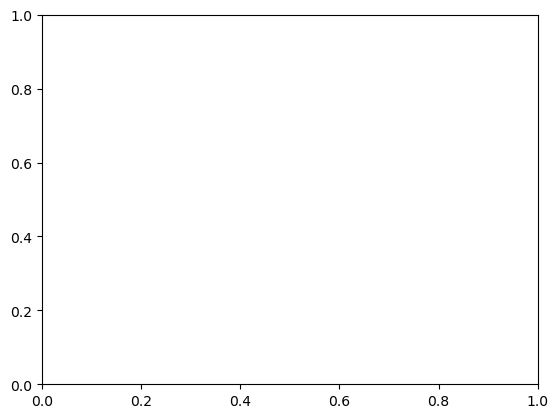

In [127]:
# 가구당 침실 특성
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing.plot(kind = "scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)

In [ ]:
# 가정 수 당 인구 특성
housing["population_per_household"] = housing["population"]/housing["households"]
housing.plot(kind = "scatter", x="population_per_household", y="median_house_value", alpha=0.1)

#### 상관관계 분석 및 데이터 전처리

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
# 알고리즘을 위한 데이터 준비
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# 데이터 전처리
# 결측치 확인
housing.isna()

In [ ]:
# dropna로 제거
housing.dropna(subset=["total_bedrooms"])

In [ ]:
# drop으로 행을 제거
drop_col = housing.drop("total_bedrooms",axis = 1)

In [ ]:
# 중앙값으로 변환
median = housing["total_bedrooms"].median()

In [128]:
housing["total_bedrooms"].fillna(median, inplace=True)

In [129]:
# 사이킷런의 simpleimputer 사용

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [130]:
# 해안 인접여부 제거
housing_num = housing.drop("ocean_proximity", axis = 1)

In [131]:
# 훈련데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [132]:
# 객체 데이터에 저장
imputer.statistics_

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.13350000e+03,
        4.35000000e+02,  1.16450000e+03,  4.09000000e+02,  3.53635000e+00,
        3.00000000e+00,  2.03074875e-01])

In [133]:
housing_num.median().values

C:\Users\임채원\AppData\Local\Temp\ipykernel_13520\3605723347.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.13350000e+03,
        4.35000000e+02,  1.16450000e+03,  4.09000000e+02,  3.53635000e+00,
        2.03074875e-01])

In [134]:
# 변형한 feature 정리
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bedrooms_per_room
6927,-118.07,34.00,42.0,1392.0,351.0,1471.0,348.0,2.6300,2.0,0.252155
19037,-121.99,38.36,35.0,2728.0,451.0,1290.0,452.0,3.2768,3.0,0.165323
4851,-118.30,34.03,40.0,1695.0,374.0,1138.0,357.0,2.7125,2.0,0.220649
6956,-118.06,33.98,50.0,1146.0,238.0,579.0,213.0,2.9583,2.0,0.207679
1087,-121.83,39.72,52.0,1890.0,420.0,974.0,383.0,1.6827,2.0,0.222222
...,...,...,...,...,...,...,...,...,...,...
1374,-122.12,38.01,50.0,1300.0,263.0,691.0,239.0,3.9519,3.0,0.202308
2796,-118.05,36.64,34.0,2090.0,478.0,896.0,426.0,2.0357,2.0,0.228708
9677,-118.98,37.65,18.0,1795.0,416.0,483.0,208.0,4.5375,4.0,0.231755
3628,-118.44,34.24,35.0,2344.0,435.0,1531.0,399.0,3.7250,3.0,0.185580


In [135]:
housing.info()
# 범주형 변수 ocean_proximity 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6927 to 6961
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
 10  bedrooms_per_room   16512 non-null  float64 
dtypes: category(1), float64(9), object(1)
memory usage: 1.9+ MB


In [136]:
housing[["ocean_proximity"]].head(10)
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
6927,<1H OCEAN
19037,INLAND
4851,<1H OCEAN
6956,<1H OCEAN
1087,INLAND
...,...
1374,NEAR BAY
2796,INLAND
9677,INLAND
3628,<1H OCEAN


In [137]:
# OrdinalEncoder?
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [138]:
# 범주형 피쳐를 위해 사용합니다
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [139]:
# 원핫 인코더 사용
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()


In [140]:
# sparse row로 압축
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [141]:
housing_cat_onehot.toarray()
# 넘파이 배열로 변환

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [142]:
# 원핫 인코더 카테고리 확인합니다
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 전처리 과정을 파이프라인으로 통합

In [143]:
# 데이터 전처리 과정을 결합한 변환기
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=None):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X=None, y=None):
        return self
    def transform(self, X=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [144]:
# feature 스케일링 진행합니다
# Standard 스케일러
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribss_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
# 피쳐 인코딩
housing_pipeline = num_pipeline.fit_transform(housing_num)
housing_pipeline

array([[ 0.75019159, -0.76797718,  1.05442867, ...,  0.59270363,
        -0.57434017,  0.09864572],
       [-1.20274745,  1.27527863,  0.50057941, ..., -0.74344434,
         0.24463679, -0.02000692],
       [ 0.63560588, -0.75391808,  0.89618602, ...,  0.10789774,
        -0.27341027,  0.00882971],
       ...,
       [ 0.29683074,  0.94254661, -0.84448308, ...,  0.27879135,
         1.2885414 , -0.0659691 ],
       [ 0.56585806, -0.65550439,  0.50057941, ..., -0.43172748,
         0.17997179,  0.06495023],
       [ 0.76513755, -0.77266355,  0.57970073, ..., -0.00153488,
        -0.14541816, -0.0666528 ]])

In [145]:
num_pipeline
# 파이프라인 형태 확인

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribss_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

In [146]:
# 전체 파이프라인 설계
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
# 전처리 총합
housing_X = full_pipeline.fit_transform(housing)
housing_X



array([[ 0.75019159, -0.76797718,  1.05442867, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20274745,  1.27527863,  0.50057941, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63560588, -0.75391808,  0.89618602, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.29683074,  0.94254661, -0.84448308, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56585806, -0.65550439,  0.50057941, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76513755, -0.77266355,  0.57970073, ...,  0.        ,
         0.        ,  0.        ]])

#### 모델 선택 및 훈련

In [147]:
from sklearn.linear_model import LinearRegression

# 선형 회귀부터 진행합니다
lin_reg = LinearRegression()
lin_reg.fit(housing_X, housing_labels)

LinearRegression()

In [148]:
data = housing.iloc[:7]
labels = housing_labels.iloc[:7]
data_prepared = full_pipeline.transform(data)
print(f"7번 col까지 임시 예측값 : {lin_reg.predict(data_prepared)}")
print(f"7번 col까지 임시 레이블 : {list(labels)}")

7번 col까지 임시 예측값 : [160990.09501683 154370.05287519 177042.89756487 194421.22153081
  81940.8629635  156185.86648234 373853.44328332]
7번 col까지 임시 레이블 : [143800.0, 117600.0, 150000.0, 172600.0, 78700.0, 90400.0, 360600.0]


In [149]:
# 훈련셋 평가 - MSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_X)
housing_predictions

array([160990.09501683, 154370.05287519, 177042.89756487, ...,
       154987.70942447, 203910.09437828, 223303.59310733])

In [150]:
# MSE 값 출력합니다
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse

4625112209.74785

In [151]:
# RMSE 계산합니다
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68008.17752114705

In [152]:
# Decision tree 진행

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_X, housing_labels)

DecisionTreeRegressor()

In [153]:
# 훈련 진행
housing_predictions2 = tree_reg.predict(housing_X)
housing_predictions2

array([143800., 117600., 150000., ..., 169800., 178200., 198600.])

In [154]:
# MSE, RMSE 점수 계산합니다.
tree_mse = mean_squared_error(housing_labels, housing_predictions2)
tree_mse

0.0

In [70]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# 점수가 0 도출

0.0

#### cross validation 진행

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
scores

array([-5.35503521e+09, -5.11248567e+09, -5.35084654e+09])

In [80]:
# RMSE 점수
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([73178.10607032, 71501.6480018 , 73149.48076854])

In [81]:
print(f"점수 : {tree_rmse_scores} \n 평균 : {tree_rmse_scores.mean()} \n 표준편차 : {tree_rmse_scores.std()}")

점수 : [73178.10607032 71501.6480018  73149.48076854] 
 평균 : 72609.74494688625 
 표준편차 : 783.6300069757826


In [82]:
# 선형 회귀시 점수
lin_scores = cross_val_score(lin_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
lin_scores
lin_rmse_scores = np.sqrt(-lin_scores)

print(f"점수 : {lin_rmse_scores} \n 평균 : {lin_rmse_scores.mean()} \n 표준편차 : {lin_rmse_scores.std()}")

점수 : [68984.67988281 68065.34960176 69379.70786668] 
 평균 : 68809.91245041795 
 표준편차 : 550.6312460623941


In [89]:
# 랜덤 포레스트 학습 진행

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_X, housing_labels)

RandomForestRegressor()

In [90]:
# 앙상블 MSE
forest_scores = cross_val_score(forest_reg, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
forest_scores

array([-2.60669784e+09, -2.62565084e+09, -2.73759890e+09])

In [100]:
# RMSE, 앙상블 전체 점수
forest_rmse_scores= np.sqrt(-forest_scores)

forest_rmse_scores
print(f"점수 : {forest_rmse_scores} \n 평균 : {forest_rmse_scores.mean()} \n 표준편차 : {forest_rmse_scores.std()}")

점수 : [51055.8306178  51241.1050253  52322.06893652] 
 평균 : 51539.668193207784 
 표준편차 : 558.3874663542066


In [120]:
# SVM 회귀 모델 사용 - kernel = 선형
from sklearn import svm
svm_reg_linear = svm.SVR(kernel = 'linear')
svm_reg_linear

SVR(kernel='linear')

In [121]:
# 학습
svm_reg_linear.fit(housing_X, housing_labels)

SVR(kernel='linear')

In [110]:
# 예측
svm_predictions = svm_reg_linear.predict(housing_X)
svm_predictions

array([175998.86344215, 172736.06970443, 177101.40883142, ...,
       176072.60234099, 182154.27927178, 182056.06558201])

In [111]:
# 서포트 벡터머신 점수계산(cross_val)
svm_scores_linear = cross_val_score(svm_reg_linear, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
svm_scores_linear

array([-1.29341557e+10, -1.25789419e+10, -1.30419802e+10])

In [113]:
# 모델 사용 - kernel = RBF
svm_reg_rbf = svm.SVR(kernel = 'rbf')
svm_reg_rbf

SVR()

In [114]:
# 학습
svm_reg_rbf.fit(housing_X, housing_labels)

SVR()

In [115]:
# 예측
svm_predictions = svm_reg_rbf.predict(housing_X)
svm_predictions

array([179756.82129911, 179397.83348363, 179840.35377538, ...,
       179713.20293149, 180244.18107616, 180230.35840343])

In [116]:
# 서포트 벡터머신 점수계산(linear)
svm_scores_rbf = cross_val_score(svm_reg_rbf, housing_X, housing_labels, scoring = "neg_mean_squared_error", cv = 3)
svm_scores_rbf

array([-1.40598598e+10, -1.36835119e+10, -1.41730771e+10])

#### randomforest - 완성했다고 보고 모델 저장

In [95]:
import joblib
joblib.dump(forest_reg, "housing_forest_model.pkl")

['housing_forest_model.pkl']

In [97]:
joblib.load("housing_forest_model.pkl")

RandomForestRegressor()

In [99]:
class housing_prepared:
    def __init__(self):
        housing_prepared = full_pipeline.fit_transform(housing)